In [1]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')
df = df[['age', 'pclass']].dropna()

def categorize_age(age):
    if age <= 1:
        return 'Младенцы'
    elif age <= 12:
        return 'Дети'
    elif age <= 17:
        return 'Подростки'
    elif age <= 29:
        return 'Молодежь'
    elif age <= 59:
        return 'Зрелый возраст'
    else:
        return 'Старики'

df['age_group'] = df['age'].apply(categorize_age)

In [2]:
contingency_table = pd.crosstab(df['age_group'], df['pclass'])
print(contingency_table)


pclass            1   2    3
age_group                   
Дети              3  12   40
Зрелый возраст  114  81  109
Младенцы          1   5    8
Молодежь         43  65  163
Подростки         8   6   30
Старики          17   4    5


In [3]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi²: {chi2:.3f}, p-value: {p:.4f}, degrees of freedom: {dof}")


Chi²: 89.529, p-value: 0.0000, degrees of freedom: 10


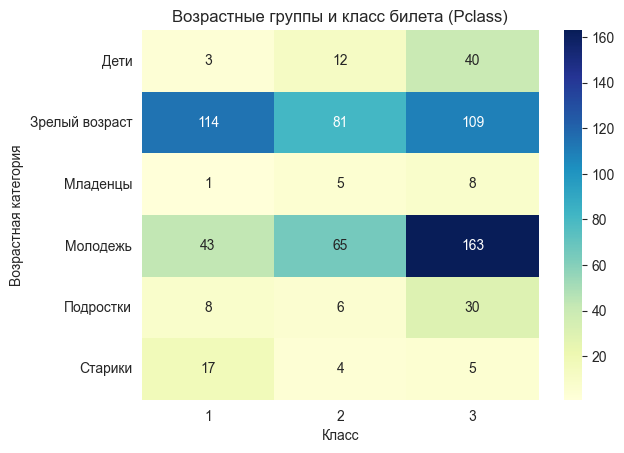

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Возрастные группы и класс билета (Pclass)")
plt.ylabel("Возрастная категория")
plt.xlabel("Класс")
plt.show()


p-value < 0.05 (и даже < 0.0001)

Нулевая гипотеза (H₀): Возрастная категория не зависит от класса билета.
Альтернатива (H₁): Возрастная категория связана с классом билета.

Вывод: возрастная категория статистически значимо зависит от класса пассажира.